# Statistics Tasks

## Statistics Task 1 - Correlation Heatmap Analysis

**Purpose:** This heatmap visualizes the correlation matrix between all chemical attributes and wine quality to identify which features have the greatest impact on wine quality.

**Key Takeaways:**
- The top 3 chemical features most correlated with wine quality are revealed through the correlation values with the 'quality' column
- Red cells indicate positive correlations, while blue cells indicate negative correlations
- This analysis helps us focus on the most influential variables for further statistical modeling and data mining tasks

Top 3 chemical features impacting wine quality:
alcohol        0.484866
sulphates      0.257710
citric acid    0.240821
Name: quality, dtype: float64


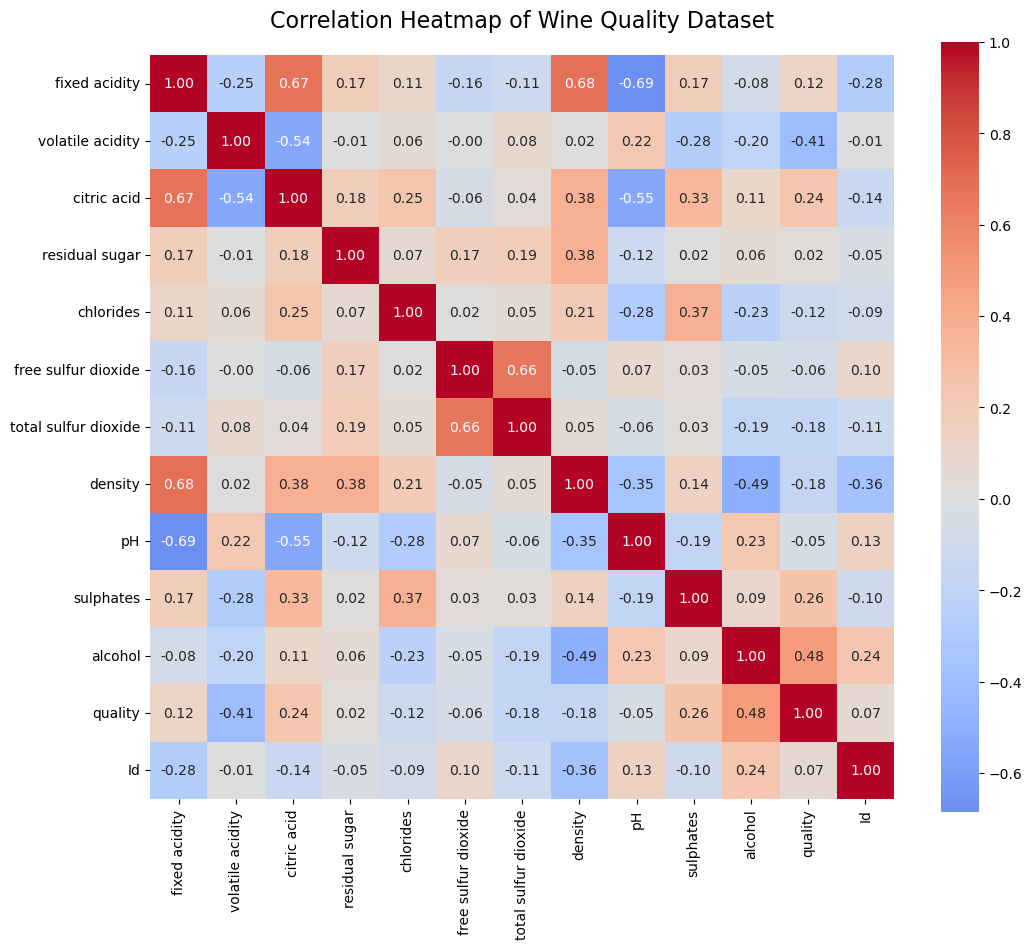

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("WineQT.csv")

corr_with_quality = df.corr()['quality'].drop('quality').sort_values(ascending=False)
top_3_features = corr_with_quality.head(3)

print("Top 3 chemical features impacting wine quality:")
print(top_3_features)

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0, square=True)
plt.title("Correlation Heatmap of Wine Quality Dataset", fontsize=16, pad=20)


plt.show()

## Statistics Task 2 - Bar Plot Analysis

**Purpose:** These bar plots visualize the mean values of four selected chemical attributes (alcohol, sulphates, volatile acidity, and pH) to compare their central tendencies across the wine dataset.

**Key Takeaways:**
- Alcohol content shows the highest mean value among the selected attributes
- The relative magnitudes of these means help understand the typical chemical composition of wines
- This comparison reveals which attributes are present in higher or lower concentrations
- Understanding these baseline values provides context for interpreting clustering and classification results

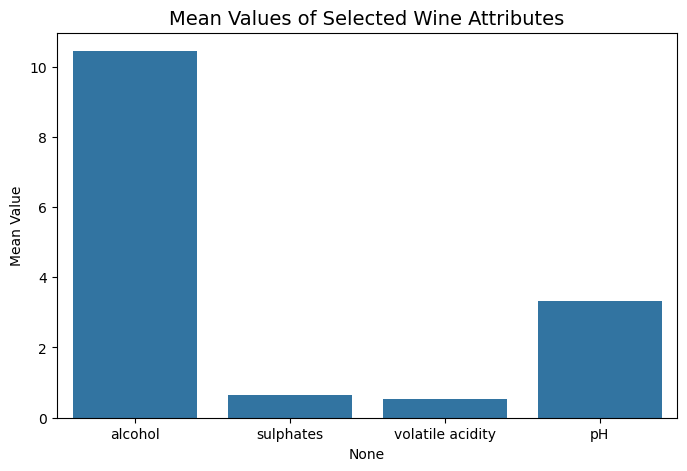

In [30]:
attributes = ['alcohol', 'sulphates', 'volatile acidity', 'pH']
means = df[attributes].mean()
stds = df[attributes].std()

plt.figure(figsize=(8,5))
sns.barplot(x=means.index, y=means.values)
plt.title("Mean Values of Selected Wine Attributes", fontsize=14)
plt.ylabel("Mean Value")
plt.show()

## Statistics Task 3 - Line Plot Analysis

**Purpose:** These line plots show the values of four chemical attributes across different wine samples, allowing us to observe trends and variations in the data distribution.

**Key Takeaways:**
- The plots reveal the range and distribution of each attribute across the dataset
- Some attributes show more variability than others, indicating different levels of consistency
- Patterns or clusters in the lines may suggest natural groupings in the data
- Understanding these distributions helps in feature selection and preprocessing decisions

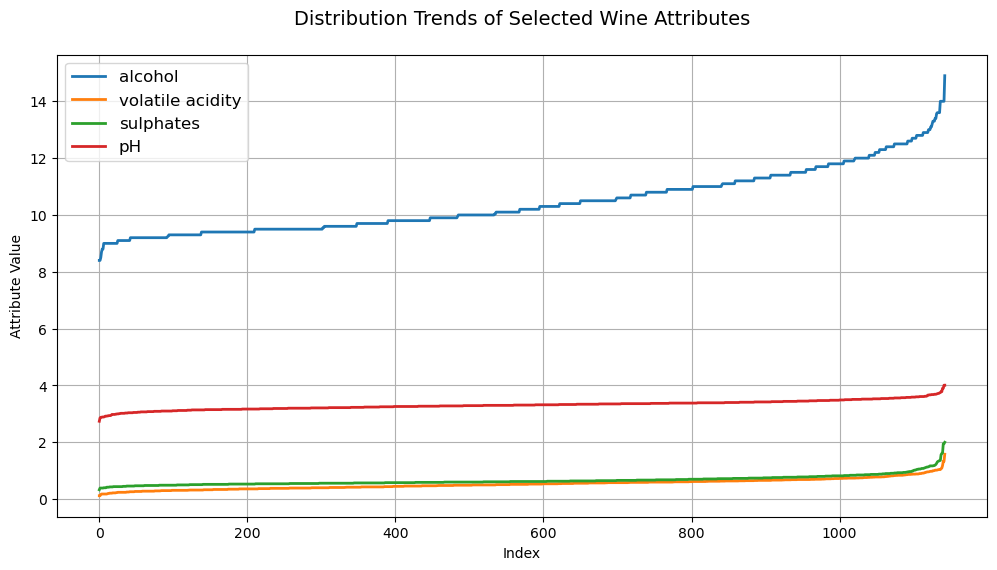

In [34]:
attributes = ['alcohol', 'volatile acidity', 'sulphates', 'pH']

plt.figure(figsize=(12,6))
for col in attributes:
    plt.plot(range(len(df)), df[col].sort_values().values, label=col, linewidth=2)

plt.legend(fontsize=12)
plt.title("Distribution Trends of Selected Wine Attributes\n", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Attribute Value")
plt.grid(True)
plt.show()


# Data Mining Tasks

## K-Means Clustering Analysis

**Purpose:** To classify wines into different price categories based on chemical attributes using K-means clustering and determine the optimal number of clusters.

**Key Takeaways:**
- These clusters represent distinct wine profiles that could correspond to different price segments
- Chemical attributes like alcohol content, sulphates, and acidity levels drive the clustering results
- As x increases the price group increases and as Y decreases the wines are more similar within each price group


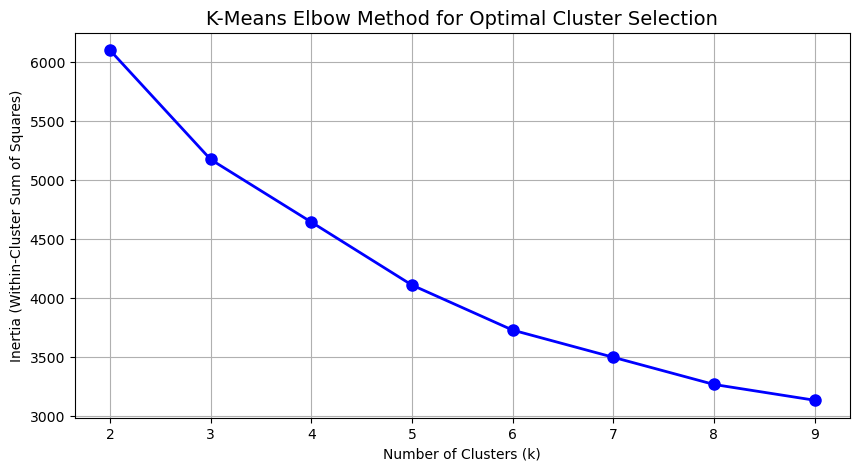

Inertia values: [6102.320753045071, 5175.695523836563, 4644.587137249362, 4110.397334282268, 3728.671235347987, 3498.100532803897, 3267.6772719977016, 3133.8262395179736]


In [35]:
# Select features for clustering
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
            'free sulfur dioxide', 'sulphates', 'alcohol']

X = df[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluate clustering 
inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10,5))
plt.plot(K, inertia, 'o-', color='blue', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title("K-Means Elbow Method for Optimal Cluster Selection", fontsize=14)
plt.grid(True)
plt.show()

print("Inertia values:", inertia)

## K-Nearest Neighbors Classification Analysis

**Purpose:** To determine the optimal number of neighbors (k) for predicting wine quality accurately using K-Nearest Neighbors classification with cross-validation.

**Key Takeaways:**
- Cross-validation ensures the model generalizes well to unseen data by testing on multiple splits
- The performance typically improves to an optimum then may decrease with larger k values
- This analysis provides the most reliable k parameter for accurate wine quality prediction

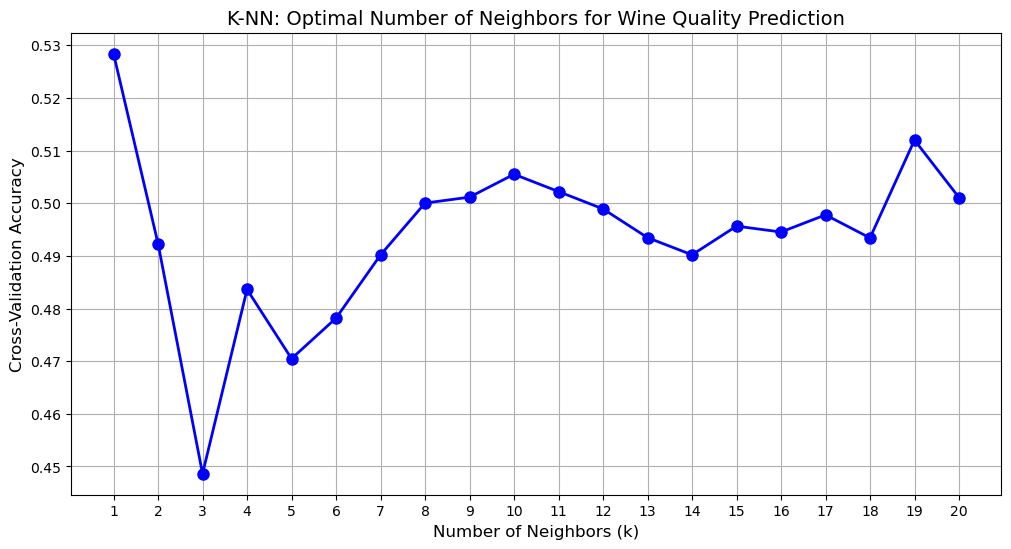

Optimal number of neighbors (k): 1
Best cross-validation accuracy: 0.528


In [36]:
# Prepare features and target
X = df.drop(columns=['quality', 'Id'])
y = df['quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try k values from 1 to 20
k_values = range(1, 21)
cv_scores = []

# Evaluate each k using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find optimal k
optimal_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('K-NN: Optimal Number of Neighbors for Wine Quality Prediction', fontsize=14)
plt.grid(True)
plt.xticks(k_values)
plt.show()

print(f"Optimal number of neighbors (k): {optimal_k}")
print(f"Best cross-validation accuracy: {best_score:.3f}") 